In [2]:
import boto3
import os
import json
import docx
from IPython.display import Markdown, display

region = os.environ.get("AWS_REGION")
boto3_bedrock = boto3.client(service_name='bedrock-runtime')
from core_lib.math_question_generation import Analyticsfunction, mathquestion
from core_lib.base_function import pdfuplaodllmmodelselection

In [3]:
# initiate the objects 

obj = Analyticsfunction()
claude3 = obj.call_claude_sonet_text
math = mathquestion()
extract_python_code =  math.extract_python_code
detect_shape = math.detect_shape
create_image = math.create_image
getText = math.getText
question_answer_generation = math.question_answer_generation
create_summary = math.create_summary

In [4]:
def translate(text):
    translate = boto3.client(service_name='translate', region_name='us-east-1')
    result = translate.translate_text(Text=text, SourceLanguageCode='en', TargetLanguageCode='hi')
    return result.get('TranslatedText')

# note and text in one string
def note_and_text(note, text):
    return f"{note}\n{text}"


def extract_json(response):
    try:
        # Find the start and end indices of the JSON data
        start_index = response.find('{')
        end_index = response.rfind('}') + 1
        
        # Extract the JSON data substring
        json_data = response[start_index:end_index]
        
        # Parse the JSON data
        data = json.loads(json_data)
        
        return data
    except (ValueError, TypeError):
        print("Error: Invalid JSON data")
        return None

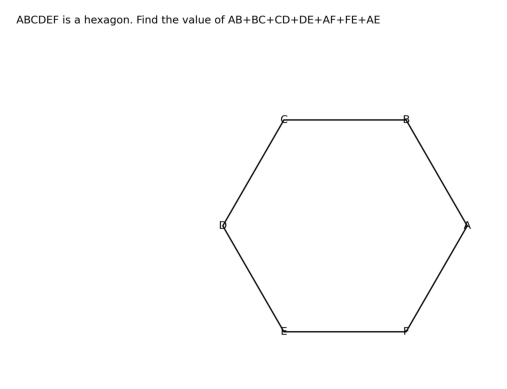

In [4]:
context = "ABCDEF is a hexagon. Find the value of AB+BC+CD+DE+AF+FE+AE "
create_image(context)

Figure(600x600)


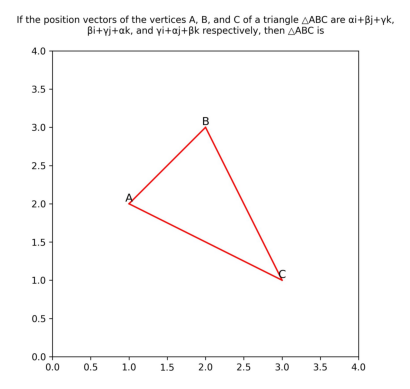

In [6]:
create_image("If the position vectors of the vertices A, B, and C of a triangle △ABC are αi+βj+γk, βi+γj+αk, and γi+αj+βk respectively, then △ABC is ")

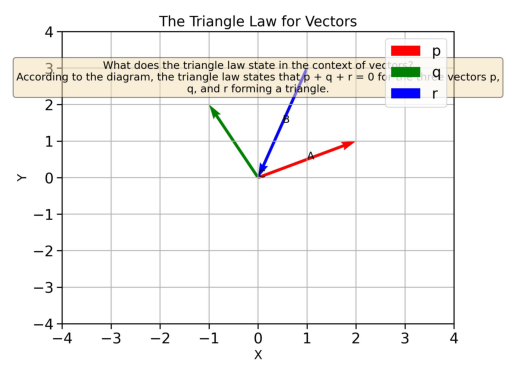

In [5]:
context4 = "What does the triangle law state in the context of vectors? According to the diagram, the triangle law states that p + q + r = 0 for the three vectors p, q, and r forming a triangle."
create_image(context4)

Figure(600x400)


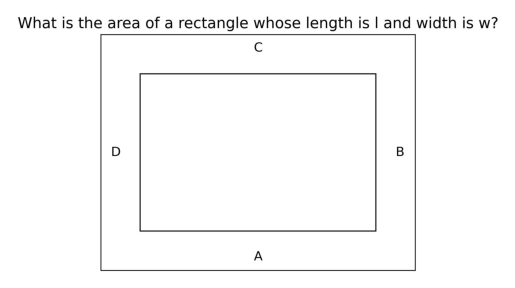

In [10]:
context5 = "what is area of rectangle whose length is l and width is w"
create_image(context5)

In [11]:
# obj = AudioToText()
# obj.convert("audiofilessample")

In [12]:
#read text file from local
def read_file(filename):
    with open(filename, 'r') as f:
        return f.read()

In [13]:
text  = read_file("/Users/tiwarysa/Documents/mathimage/customer_document/video_text.txt")

In [14]:
modelid = "anthropic.claude-v2"
question = "create a summary of the entire document"

maxt = 500
t = 0.9

In [15]:
note = getText("1.notes.docx")

In [16]:
summary = create_summary(text)
#save summary to file
with open('summary.txt', 'w') as f:
    f.write(summary)

Here is a summary of the document in around 1000 words:

The document is a transcript of an online lecture on 3D coordinate geometry. The key points covered are:

Introduction to 3D Coordinate Geometry
- Just like in 2D coordinate geometry, in 3D we have coordinates to represent the position of a point, but now we need three coordinates (x, y, z) instead of two. 
- The three coordinate axes are x, y and z axes, perpendicular to each other.
- The coordinates of a point P are written as (x, y, z) where x is the perpendicular distance from yz-plane, y is the perpendicular distance from xz-plane and z is the perpendicular distance from xy-plane.

Distance Formula in 3D
- The distance between two points A(x1, y1, z1) and B(x2, y2, z2) is given by:
√[(x2-x1)2 + (y2-y1)2 + (z2-z1)2]

Section Formula and Ratio Formula
- To find the ratio in which a line segment is divided by a plane Ax + By + Cz + D = 0, the formula is: 
(Ax1 + By1 + Cz1 + D) : (Ax2 + By2 + Cz2 + D)
- Internal and external division point formulas are derived using this ratio.

Mid-Point Formula
- The mid-point M of the line segment joining A(x1, y1, z1) and B(x2, y2, z2) has coordinates:
M = ((x1+x2)/2, (y1+y2)/2, (z1+z2)/2)  

Centroid
- The centroid (center of mass) of a triangle with vertices A(x1,y1,z1), B(x2,y2,z2), C(x3,y3,z3) has coordinates:
((ax1 + bx2 + cx3)/(a+b+c), (ay1 + by2 + cy3)/(a+b+c), (az1 + bz2 + cz3)/(a+b+c))
where a, b, c are the lengths of the sides opposite A, B, C respectively.

- For a tetrahedron with vertices A, B, C, D, the centroid formula is:
((ax1 + bx2 + cx3 + dx4)/(a+b+c+d), ...similarly for y and z coordinates)

The lecture also covered some examples and practice questions related to finding coordinates satisfying colinearity conditions, finding the fourth vertex of a parallelogram given three consecutive vertices, and using the formulas learned.

Overall, the key formulas and concepts of 3D coordinate geometry like distance formula, section formula, mid-point formula, centroid were explained in detail using examples. The similarity to 2D coordinate geometry concepts was also highlighted.

In [17]:
#read summary txt file from local

read_file = open("summary.txt", "r")
summary = read_file.read()

combined_document = note_and_text(note, summary)

In [29]:
prompt = f'''Human: Please generate 7 multiple-choice questions and their respective answers based on the content provided in the attached document. Each question should have 4 answer choices, with only one correct answer.
        additionally, please provide a brief explanation for each correct answer, helping to clarify the reasoning behind it.
        create the answer in json format include question, options, answer, explanation. 
        the documents are belonging to math topic, so create basic questions for different type so shapes.

        <book>
        {combined_document}
        </book>
        create the response in json format

        Assistant:'''

body = json.dumps({"prompt": prompt})

In [30]:
question = question_answer_generation(body)

{
    "questions": [
        {
            "question": "What are the coordinates of the x-axis?",
            "options": [
                "A) y = 0, z = 0",
                "B) x = 0, z = 0",
                "C) x = 0, y = 0",
                "D) None of the above"
            ],
            "answer": "A",
            "explanation": "The x-axis is represented by the equation y = 0 and z = 0, which means all points on the x-axis have y and z coordinates equal to zero."
        },
        {
            "question": "If two points A(x1, y1, z1) and B(x2, y2, z2) are given, what is the formula to find the distance between them?",
            "options": [
                "A) √((x2-x1)2 + (y2-y1)2 + (z2-z1)2)",
                "B) (x2-x1)2 + (y2-y1)2 + (z2-z1)2",
                "C) (x2+x1)2 + (y2+y1)2 + (z2+z1)2",
                "D) None of the above"
            ],
            "answer": "A",
            "explanation": "The distance formula in 3D coordinate geometry is the extension of the 2D distance formula, where we take the square root of the sum of the squared differences of the respective coordinates."
        },
        {
            "question": "If three points A(x1, y1, z1), B(x2, y2, z2), and C(x3, y3, z3) are collinear (lie on the same line), which condition must be satisfied?",
            "options": [
                "A) (x2-x1)/(x3-x1) = (y2-y1)/(y3-y1) = (z2-z1)/(z3-z1)",
                "B) (x2-x1)/(x3-x1) + (y2-y1)/(y3-y1) + (z2-z1)/(z3-z1) = 0",
                "C) (x2-x1)*(y3-y1) - (y2-y1)*(x3-x1) = (x2-x1)*(z3-z1) - (z2-z1)*(x3-x1) = 0",
                "D) None of the above"
            ],
            "answer": "C",
            "explanation": "For three points to be collinear in 3D, the vector cross product of any two vectors formed by the points must be zero. This condition is satisfied when the determinant formed by the coordinate differences is equal to zero."
        },
        {
            "question": "What is the formula to find the centroid (center of mass) of a triangle with vertices A(x1, y1, z1), B(x2, y2, z2), and C(x3, y3, z3)?",
            "options": [
                "A) ((x1+x2+x3)/3, (y1+y2+y3)/3, (z1+z2+z3)/3)",
                "B) ((ax1 + bx2 + cx3)/(a+b+c), (ay1 + by2 + cy3)/(a+b+c), (az1 + bz2 + cz3)/(a+b+c))",
                "C) ((x1+x2)/2, (y1+y2)/2, (z1+z2)/2)",
                "D) None of the above"
            ],
            "answer": "B",
            "explanation": "The centroid of a triangle is the point where the three medians (lines joining the vertices to the midpoints of the opposite sides) intersect. The formula given takes into account the lengths of the sides to find the weighted average of the vertex coordinates."
        },
        {
            "question": "What is the formula to find the mid-point of the line segment joining two points A(x1, y1, z1) and B(x2, y2, z2)?",
            "options": [
                "A) ((x1+x2)/2, (y1+y2)/2, (z1+z2)/2)",
                "B) ((ax1 + bx2)/(a+b), (ay1 + by2)/(a+b), (az1 + bz2)/(a+b))",
                "C) ((x1+x2+x3)/3, (y1+y2+y3)/3, (z1+z2+z3)/3)",
                "D) None of the above"
            ],
            "answer": "A",
            "explanation": "The mid-point of a line segment is the point that divides the segment into two equal halves. The coordinates of the mid-point are simply the averages of the corresponding coordinates of the two endpoints."
        },
        {
            "question": "If a line segment joining two points A(x1, y1, z1) and B(x2, y2, z2) is divided externally by a plane ax + by + cz + d = 0 in the ratio k:1, what is the formula to find the division point?",
            "options": [
                "A) ((kx1+x2)/(k+1), (ky1+y2)/(k+1), (kz1+z2)/(k+1))",
                "B) ((x1+kx2)/(1+k), (y1+ky2)/(1+k), (z1+kz2)/(1+k))",
                "C) ((x1+x2)/2, (y1+y2)/2, (z1+z2)/2)",
                "D) None of the above"
            ],
            "answer": "B",
            "explanation": "In the case of external division, the division point lies outside the line segment. The formula given finds the weighted average of the endpoint coordinates, with weights (1+k) and k, to obtain the division point coordinates."
        },
        {
            "question": "What is the formula to find the incentre (the point where the three angle bisectors of a triangle intersect) of a triangle with sides BC = a, AC = b, and AB = c?",
            "options": [
                "A) (a/(a+b+c), b/(a+b+c), c/(a+b+c))",
                "B) (a*cos(A), b*cos(B), c*cos(C))",
                "C) (a*sin(A), b*sin(B), c*sin(C))",
                "D) None of the above"
            ],
            "answer": "A",
            "explanation": "The incentre of a triangle is the point where the three angle bisectors intersect. Its coordinates are proportional to the side lengths, with the proportionality constant being the reciprocal of the sum of the side lengths."
        }
    ]
}

In [31]:
question

'{\n    "questions": [\n        {\n            "question": "What are the coordinates of the x-axis?",\n            "options": [\n                "A) y = 0, z = 0",\n                "B) x = 0, z = 0",\n                "C) x = 0, y = 0",\n                "D) None of the above"\n            ],\n            "answer": "A",\n            "explanation": "The x-axis is represented by the equation y = 0 and z = 0, which means all points on the x-axis have y and z coordinates equal to zero."\n        },\n        {\n            "question": "If two points A(x1, y1, z1) and B(x2, y2, z2) are given, what is the formula to find the distance between them?",\n            "options": [\n                "A) √((x2-x1)2 + (y2-y1)2 + (z2-z1)2)",\n                "B) (x2-x1)2 + (y2-y1)2 + (z2-z1)2",\n                "C) (x2+x1)2 + (y2+y1)2 + (z2+z1)2",\n                "D) None of the above"\n            ],\n            "answer": "A",\n            "explanation": "The distance formula in 3D coordinate geometry 

In [32]:
json_data = extract_json(question)
if json_data:
    print(json_data)

{'questions': [{'question': 'What are the coordinates of the x-axis?', 'options': ['A) y = 0, z = 0', 'B) x = 0, z = 0', 'C) x = 0, y = 0', 'D) None of the above'], 'answer': 'A', 'explanation': 'The x-axis is represented by the equation y = 0 and z = 0, which means all points on the x-axis have y and z coordinates equal to zero.'}, {'question': 'If two points A(x1, y1, z1) and B(x2, y2, z2) are given, what is the formula to find the distance between them?', 'options': ['A) √((x2-x1)2 + (y2-y1)2 + (z2-z1)2)', 'B) (x2-x1)2 + (y2-y1)2 + (z2-z1)2', 'C) (x2+x1)2 + (y2+y1)2 + (z2+z1)2', 'D) None of the above'], 'answer': 'A', 'explanation': 'The distance formula in 3D coordinate geometry is the extension of the 2D distance formula, where we take the square root of the sum of the squared differences of the respective coordinates.'}, {'question': 'If three points A(x1, y1, z1), B(x2, y2, z2), and C(x3, y3, z3) are collinear (lie on the same line), which condition must be satisfied?', 'options

In [33]:
json_data["questions"][0]

{'question': 'What are the coordinates of the x-axis?',
 'options': ['A) y = 0, z = 0',
  'B) x = 0, z = 0',
  'C) x = 0, y = 0',
  'D) None of the above'],
 'answer': 'A',
 'explanation': 'The x-axis is represented by the equation y = 0 and z = 0, which means all points on the x-axis have y and z coordinates equal to zero.'}

Question: x-अक्ष के निर्देशांक क्या हैं?


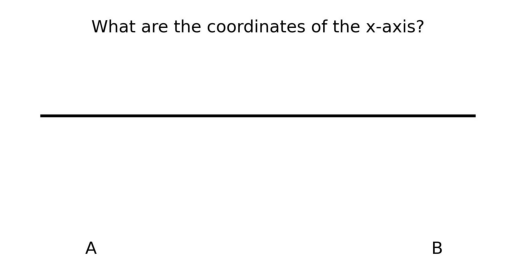

Options: ['A) y = 0, z = 0', 'B) x = 0, z = 0', 'C) x = 0, y = 0', 'D) None of the above']
Answer: A
Explanation: x-अक्ष को y = 0 और z = 0 समीकरण द्वारा दर्शाया जाता है, जिसका अर्थ है कि x-अक्ष के सभी बिंदुओं में y और z निर्देशांक शून्य के बराबर होते हैं।
--------------------------------------
Question: यदि दो बिंदु A (x1, y1, z1) और B (x2, y2, z2) दिए गए हैं, तो उनके बीच की दूरी ज्ञात करने का सूत्र क्या है?
Figure(640x480)


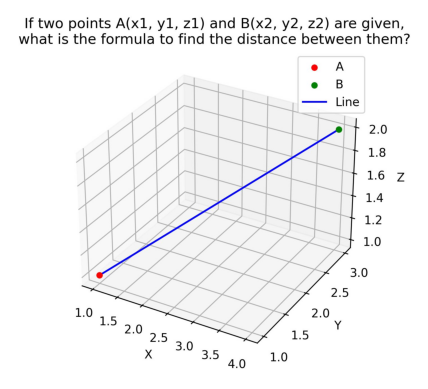

Options: ['A) √((x2-x1)2 + (y2-y1)2 + (z2-z1)2)', 'B) (x2-x1)2 + (y2-y1)2 + (z2-z1)2', 'C) (x2+x1)2 + (y2+y1)2 + (z2+z1)2', 'D) None of the above']
Answer: A
Explanation: 3D निर्देशांक ज्यामिति में दूरी सूत्र 2D दूरी सूत्र का विस्तार है, जहाँ हम संबंधित निर्देशांक के वर्ग अंतरों के योग का वर्गमूल लेते हैं।
--------------------------------------
Question: यदि तीन बिंदु A (x1, y1, z1), B (x2, y2, z2), और C (x3, y3, z3) संरेखीय हैं (एक ही रेखा पर स्थित हैं), तो कौन सी शर्त पूरी होनी चाहिए?
Figure(800x600)


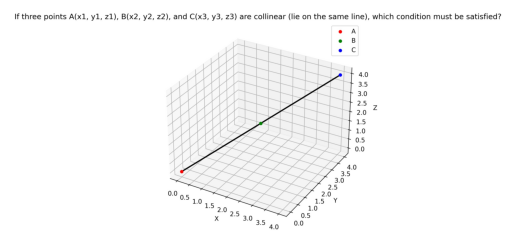

Options: ['A) (x2-x1)/(x3-x1) = (y2-y1)/(y3-y1) = (z2-z1)/(z3-z1)', 'B) (x2-x1)/(x3-x1) + (y2-y1)/(y3-y1) + (z2-z1)/(z3-z1) = 0', 'C) (x2-x1)*(y3-y1) - (y2-y1)*(x3-x1) = (x2-x1)*(z3-z1) - (z2-z1)*(x3-x1) = 0', 'D) None of the above']
Answer: C
Explanation: 3 डी में तीन बिंदुओं के कोलिनियर होने के लिए, बिंदुओं द्वारा बनाए गए किन्हीं दो वैक्टर का वेक्टर क्रॉस उत्पाद शून्य होना चाहिए। यह स्थिति तब संतुष्ट होती है जब निर्देशांक अंतर से बनने वाला निर्धारक शून्य के बराबर होता है।
--------------------------------------
Question: शीर्ष A (x1, y1, z1), B (x2, y2, z2), और C (x3, y3, z3) वाले त्रिभुज के केन्द्रक (द्रव्यमान का केंद्र) को खोजने का सूत्र क्या है?
Figure(600x400)


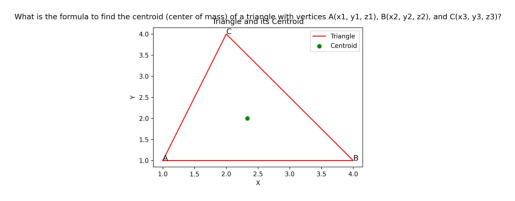

Options: ['A) ((x1+x2+x3)/3, (y1+y2+y3)/3, (z1+z2+z3)/3)', 'B) ((ax1 + bx2 + cx3)/(a+b+c), (ay1 + by2 + cy3)/(a+b+c), (az1 + bz2 + cz3)/(a+b+c))', 'C) ((x1+x2)/2, (y1+y2)/2, (z1+z2)/2)', 'D) None of the above']
Answer: B
Explanation: एक त्रिभुज का केन्द्रक वह बिंदु होता है जहाँ तीन माध्यिका (शीर्षों को विपरीत भुजाओं के मध्य बिंदुओं से मिलाने वाली रेखाएँ) एक दूसरे को काटती हैं। दिए गए सूत्र में शीर्ष निर्देशांक के भारित औसत का पता लगाने के लिए भुजाओं की लंबाई को ध्यान में रखा गया है।
--------------------------------------
Question: दो बिंदुओं A (x1, y1, z1) और B (x2, y2, z2) को मिलाने वाले रेखाखंड के मध्य-बिंदु को खोजने का सूत्र क्या है?
Figure(600x400)


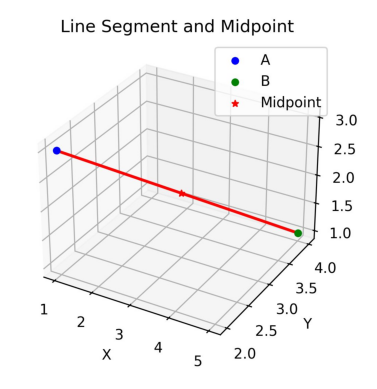

Options: ['A) ((x1+x2)/2, (y1+y2)/2, (z1+z2)/2)', 'B) ((ax1 + bx2)/(a+b), (ay1 + by2)/(a+b), (az1 + bz2)/(a+b))', 'C) ((x1+x2+x3)/3, (y1+y2+y3)/3, (z1+z2+z3)/3)', 'D) None of the above']
Answer: A
Explanation: रेखाखंड का मध्य-बिंदु वह बिंदु होता है जो खंड को दो समान हिस्सों में विभाजित करता है। मध्य-बिंदु के निर्देशांक केवल दो अंतिम बिंदुओं के संबंधित निर्देशांक का औसत होते हैं।
--------------------------------------
Question: यदि दो बिंदुओं A (x1, y1, z1) और B (x2, y2, z2) को मिलाने वाला एक रेखाखंड बाहरी रूप से समतल ax + by + cz + d = 0 से k:1 के अनुपात में विभाजित किया जाता है, तो विभाजन बिंदु को खोजने का सूत्र क्या है?
Figure(640x480)


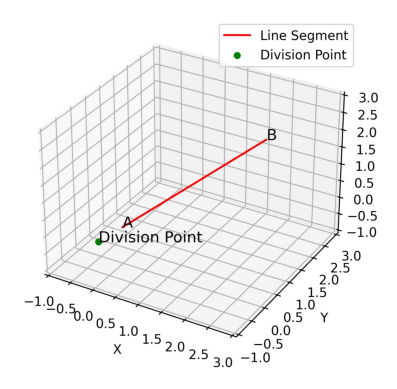

Options: ['A) ((kx1+x2)/(k+1), (ky1+y2)/(k+1), (kz1+z2)/(k+1))', 'B) ((x1+kx2)/(1+k), (y1+ky2)/(1+k), (z1+kz2)/(1+k))', 'C) ((x1+x2)/2, (y1+y2)/2, (z1+z2)/2)', 'D) None of the above']
Answer: B
Explanation: बाहरी विभाजन के मामले में, विभाजन बिंदु रेखा खंड के बाहर स्थित है। दिया गया सूत्र विभाजन बिंदु निर्देशांक प्राप्त करने के लिए वज़न (1+k) और k के साथ एंडपॉइंट निर्देशांक का भारित औसत पाता है।
--------------------------------------
Question: BC = a, AC = b, और AB = c भुजाओं वाले त्रिभुज के अंतःकेंद्र (वह बिंदु जहाँ त्रिभुज के तीन कोण द्विभाजक प्रतिच्छेदन करते हैं) को खोजने का सूत्र क्या है?
Figure(800x600)


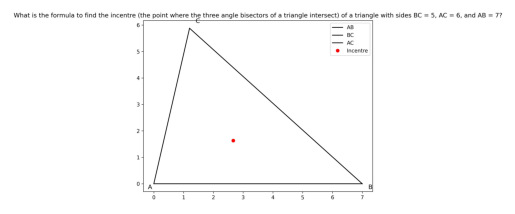

Options: ['A) (a/(a+b+c), b/(a+b+c), c/(a+b+c))', 'B) (a*cos(A), b*cos(B), c*cos(C))', 'C) (a*sin(A), b*sin(B), c*sin(C))', 'D) None of the above']
Answer: A
Explanation: त्रिभुज का अंत:केंद्र वह बिंदु होता है जहां तीन कोण वाले द्विभाजक प्रतिच्छेदन करते हैं। इसके निर्देशांक भुजाओं की लंबाई के समानुपाती होते हैं, जिसमें आनुपातिकता स्थिरांक भुजाओं की लंबाई के योग का व्युत्क्रम होता है।
--------------------------------------


In [34]:
# Access the questions and their details
questions = json_data["questions"]
for question in questions:
    print("Question:", translate(question["question"]))
    create_image(question["question"])
    print("Options:", question["options"])
    print("Answer:", question["answer"])
    print("Explanation:", translate(question["explanation"]))
    print("--------------------------------------")